# DATASCI207 Final Project - Data Exploration

**Import Packages**

In [137]:
# standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import random
from datetime import date as dt

# visualizations
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('./Customer Personality Analysis/marketing_campaign.csv',delimiter='\t')
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [110]:
pd.set_option('display.max_columns', None)

# provide a summary of the data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Drop Unused Variables**

In [111]:
# all the data for Z_CostContact is 3
# all the data for Z_Revenue is 11
# I couldn't find either of them in the data dictionary so I decided to drop them here!
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

**Check for missing (NaN) values**

In [112]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

*Note: There are 24 null values in the Income column.*

In [113]:
df['Income'].fillna(0, inplace=True) # we need to decide if we drop these records or replace it with 0

**Variables - Customer Profile**

**(1) # of Kids/Teenagers at home**

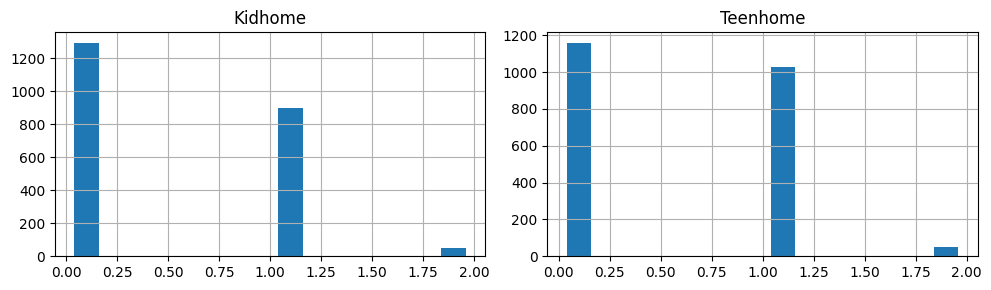

In [114]:
variables = ['Kidhome','Teenhome']
df[variables].hist(bins=10, rwidth=0.6, figsize=(10, 3))
plt.tight_layout()
plt.show()

In [115]:
# combine the number of teens and the number of kids into one column called children
df["Children"]=(df["Kidhome"]+df["Teenhome"]).astype(int)
children = df['Children'].value_counts().reset_index()
children

,Children,count
0,1,1128
1,0,638
2,2,421
3,3,53


**(2) Education**

In [116]:
# Combined '2n Cycle' to 'Master'

df.loc[df['Education'].isin(['2n Cycle']), 'Education'] = 'Master'
Education = df['Education'].value_counts().reset_index()
Education

,Education,count
0,Graduation,1127
1,Master,573
2,PhD,486
3,Basic,54


<Axes: xlabel='Education', ylabel='count'>

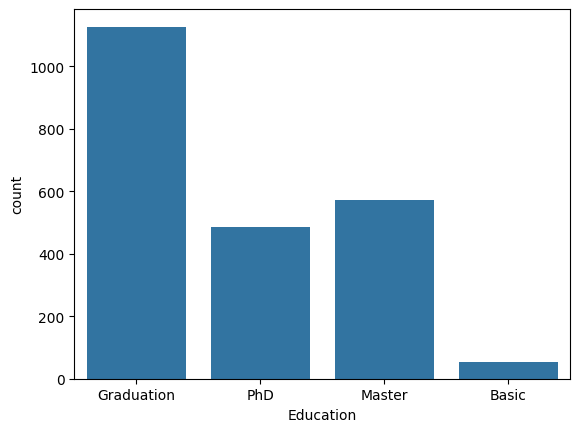

In [117]:
sns.countplot(x=df['Education'])

**(3) Marital Status**

In [118]:
Marital_Status = df['Marital_Status'].value_counts().reset_index()
Marital_Status

,Marital_Status,count
0,Married,864
1,Together,580
2,Single,480
3,Divorced,232
4,Widow,77
5,Alone,3
6,Absurd,2
7,YOLO,2


<Axes: xlabel='Marital_Status', ylabel='count'>

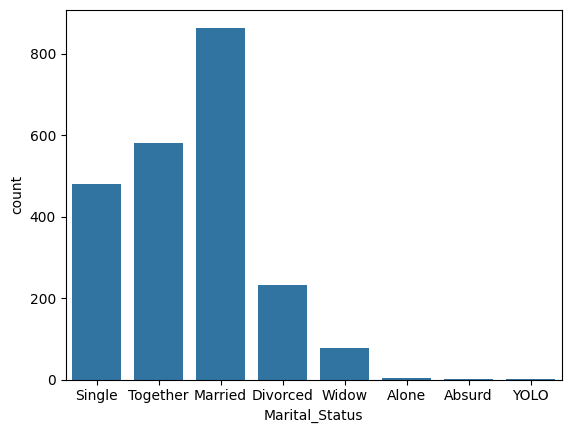

In [119]:
sns.countplot(x=df['Marital_Status'])

In [120]:
# map the marital status into number of family sizes
marital_status_mapping = {'Single': 1, 'Together':2,'Married': 2, 'Divorced': 1, 'Widow': 1, 'Alone': 1,'Absurd':1,'YOLO':1}

In [121]:
# create a family size column by adding the number of children in
df['Family_Size'] = df['Marital_Status'].map(marital_status_mapping).astype(int) + df['Children']

In [122]:
Family_Size = df['Family_Size'].value_counts().reset_index()
Family_Size

,Family_Size,count
0,3,889
1,2,764
2,4,301
3,1,254
4,5,32


**(4) Income**

In [123]:
# create income buckets
buckets = [(0, 30000),(30001, 60000),(60001, 90000)]
# define labels for each bucket
labels = ['Low Income', 'Medium Income', 'High Income']

# create a function to assign income buckets
def assign_bucket(income):
    for i, (min, max) in enumerate(buckets):
        if min <= income <= max:
            return labels[i]
    return 'Very High Income'

df['Income_Buckets'] = df['Income'].apply(assign_bucket)

In [124]:
Income = df['Income_Buckets'].value_counts().reset_index()
Income

,Income_Buckets,count
0,Medium Income,1005
1,High Income,788
2,Low Income,394
3,Very High Income,53


<Axes: xlabel='Income_Buckets', ylabel='count'>

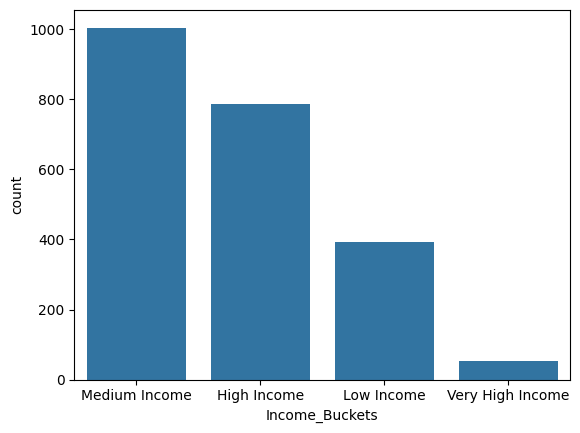

In [125]:
sns.countplot(x=df['Income_Buckets'])

**(5) Age**

In [126]:
# compute age from year of birth
df['age'] = 2024 - df['Year_Birth']

# identified three outliers here: age 131, 125 and 124
Age = df['age'].value_counts().reset_index().sort_values(by='age', ascending=False)
Age.head(10)

,age,count
56,131,1
54,125,1
57,124,1
58,84,1
55,83,1
48,81,7
49,80,7
47,79,8
43,78,16
44,77,16


In [127]:
# create age buckets
buckets = [(0, 19),(20, 39),(40, 59),(60,100)]
# define labels for each bucket
labels = ['Teenagers', 'Young Adults', 'Middle-Aged Adults','Seniors']

# create a function to assign age buckets
def assign_age_bucket(age):
    for i, (min, max) in enumerate(buckets):
        if min <= age <= max:
            return labels[i]
    return 'Outliers'

df['Age_Buckets'] = df['age'].apply(assign_age_bucket)

Age = df['Age_Buckets'].value_counts().reset_index()
Age

,Age_Buckets,count
0,Middle-Aged Adults,1233
1,Seniors,783
2,Young Adults,221
3,Outliers,3


<Axes: xlabel='Age_Buckets', ylabel='count'>

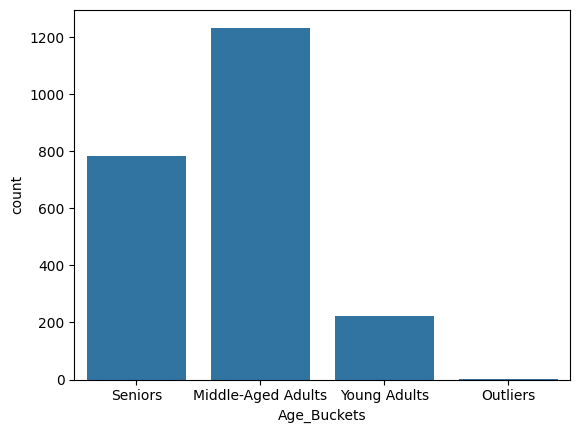

In [128]:
sns.countplot(x=df['Age_Buckets'])

**Variables - Customer Purchasing Pattern**

**(1) Promotions / Campaigns**

In [129]:
# compute the total number of campaigns accepted (out of 5)
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

TotalAcceptedCmp = df['TotalAcceptedCmp'].value_counts().reset_index()
TotalAcceptedCmp

,TotalAcceptedCmp,count
0,0,1777
1,1,325
2,2,83
3,3,44
4,4,11


In [130]:
NumDealsPurchases = df['NumDealsPurchases'].value_counts().reset_index().sort_values(by='NumDealsPurchases', ascending=False)
NumDealsPurchases

,NumDealsPurchases,count
10,15,7
14,13,3
13,12,4
12,11,5
11,10,5
9,9,8
8,8,14
7,7,40
5,6,61
4,5,94


**(2) Products**

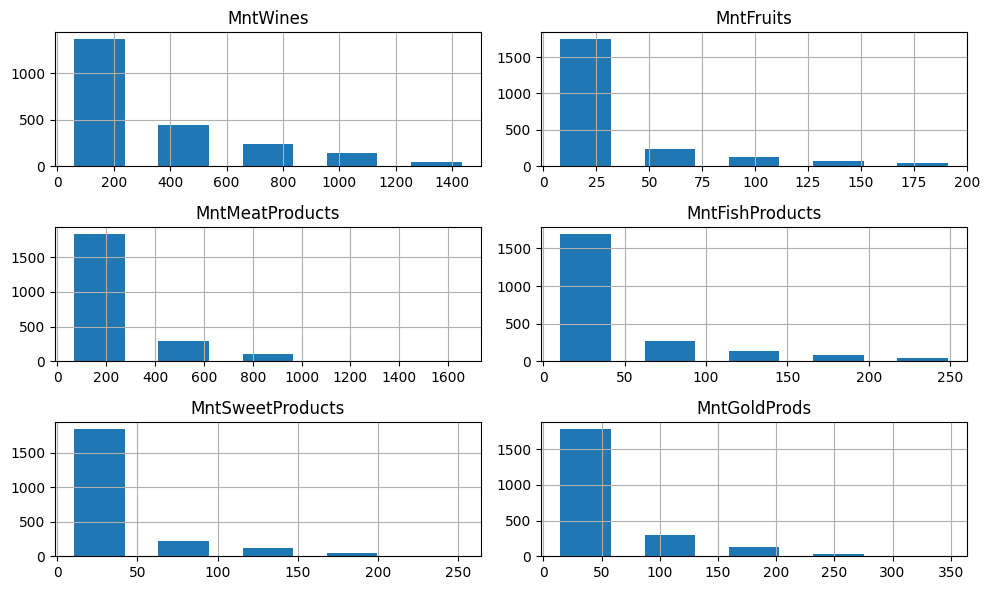

In [131]:
variables = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df[variables].hist(bins=5, rwidth=0.6, figsize=(10, 6))
plt.tight_layout()
plt.show()

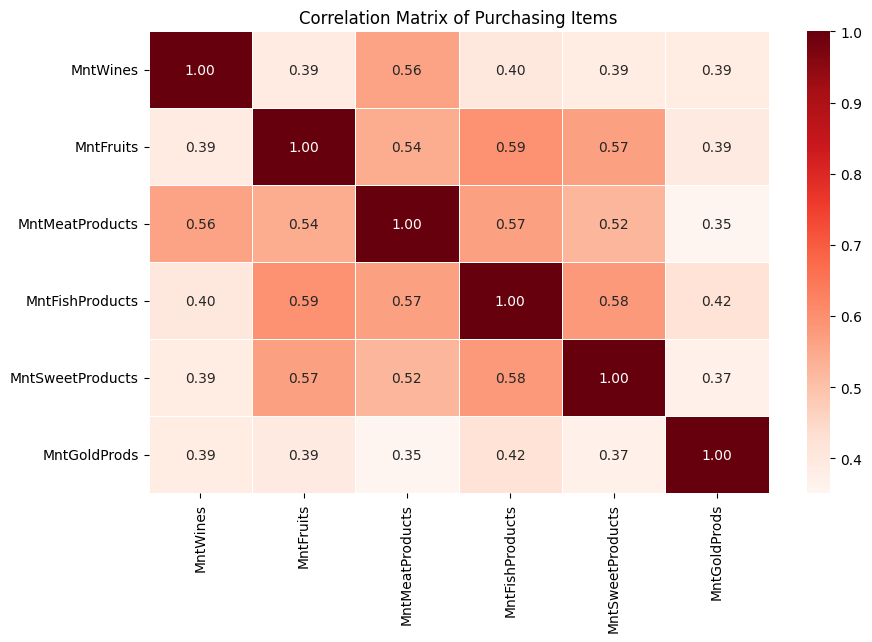

In [132]:
# calculate correlation matrix
variables = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
correlation_matrix = df[variables].corr()

# plot the result into a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Purchasing Items')
plt.show()

**(2) Purchasing Location**

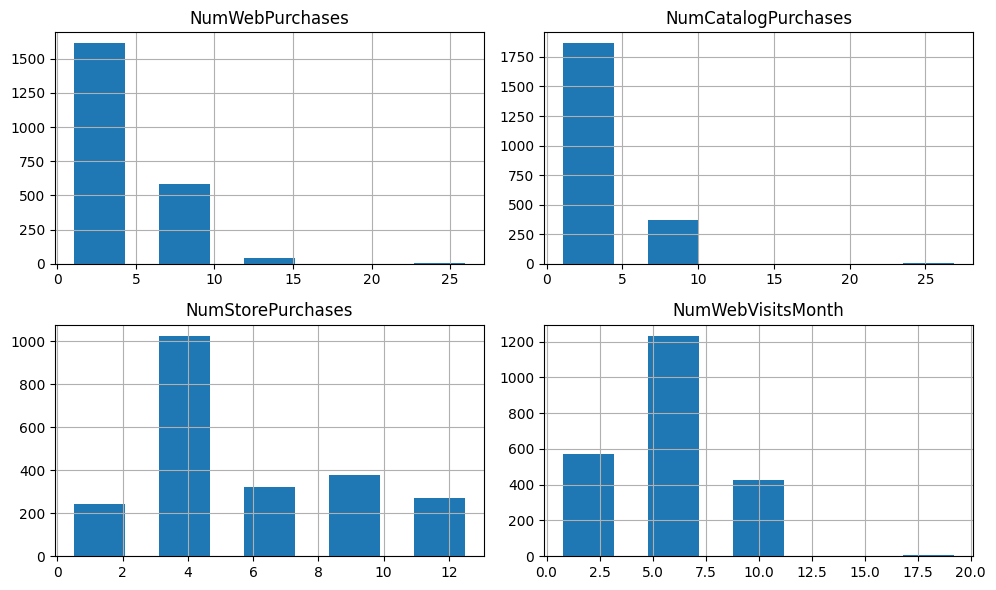

In [133]:
variables = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
df[variables].hist(bins=5, rwidth=0.6, figsize=(10, 6))
plt.tight_layout()
plt.show()

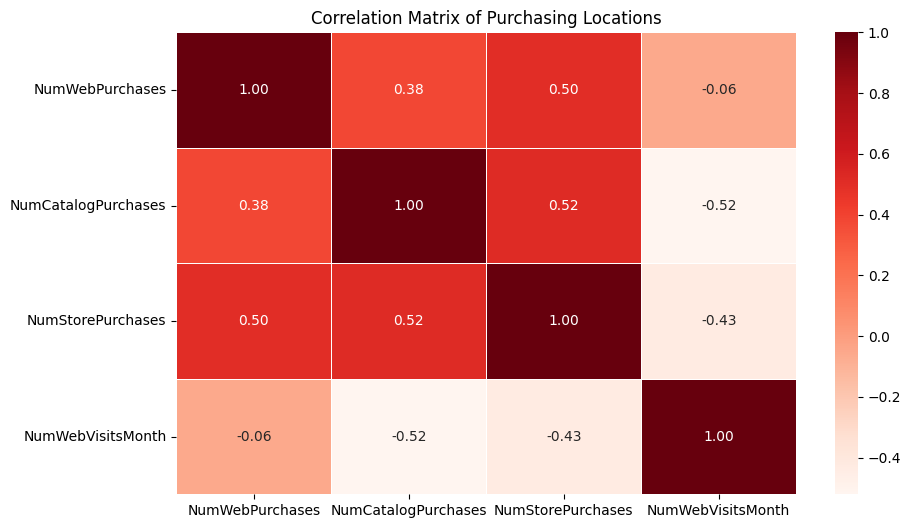

In [134]:
# calculate correlation matrix
variables = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
correlation_matrix = df[variables].corr()

# plot the result into a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Purchasing Locations')
plt.show()

**Variables - Customer Loyalty**

**(1) # of Days Enrolled in the company**

In [138]:
# compute the number of days the customer has enrolled in the company

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['days_enrolled'] = (dt.today() - df['Dt_Customer'].dt.date).apply(lambda x: x.days)

In [139]:
# compute an average
avg_days_enrolled = df['days_enrolled'].mean()
avg_days_enrolled/365

10.697485322896283

Note: An average customer has been with the company for ~11 years.

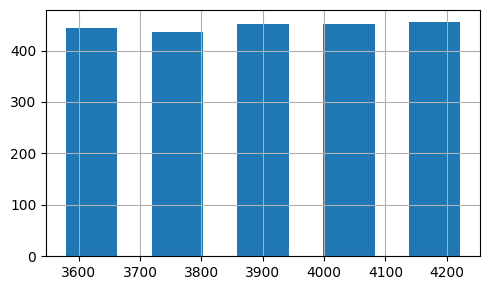

In [140]:
df['days_enrolled'].hist(bins=5, rwidth=0.6, figsize=(5,3))
plt.tight_layout()
plt.show()

**(2) Recency**

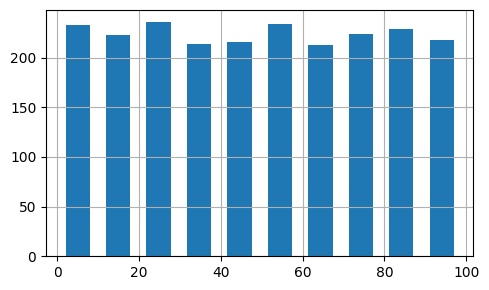

In [141]:
# Number of days since customer's last purchase - smaller the better
df['Recency'].hist(bins=10, rwidth=0.6, figsize=(5,3))
plt.tight_layout()
plt.show()

**(3) Complaint**

In [142]:
Complain = df['Complain'].value_counts().reset_index()
Complain

,Complain,count
0,0,2219
1,1,21


**Final Output**

In [143]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Family_Size,Income_Buckets,age,Age_Buckets,TotalAcceptedCmp,days_enrolled
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,Medium Income,67,Seniors,0,4214
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,Medium Income,70,Seniors,0,3664
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,High Income,59,Middle-Aged Adults,0,3863
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,Low Income,40,Middle-Aged Adults,0,3690
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,Medium Income,43,Middle-Aged Adults,0,3712
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,1,3,High Income,57,Middle-Aged Adults,0,3844
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,1,2,Medium Income,53,Middle-Aged Adults,0,4144
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,1,3,Medium Income,39,Young Adults,0,3968
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,1,3,Medium Income,50,Middle-Aged Adults,0,3939
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,2,4,Low Income,74,Seniors,1,3659


In [144]:
# drop unused/redundant features - I'm still thinking about what we can do with the education column
df_cleaned = df.drop(['Year_Birth','Marital_Status','Kidhome','Teenhome','Dt_Customer','Income_Buckets','Age_Buckets'], axis = 1)
df_cleaned.head()

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Family_Size,age,TotalAcceptedCmp,days_enrolled
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1,67,0,4214
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,3,70,0,3664
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,2,59,0,3863
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,3,40,0,3690
4,5324,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,3,43,0,3712


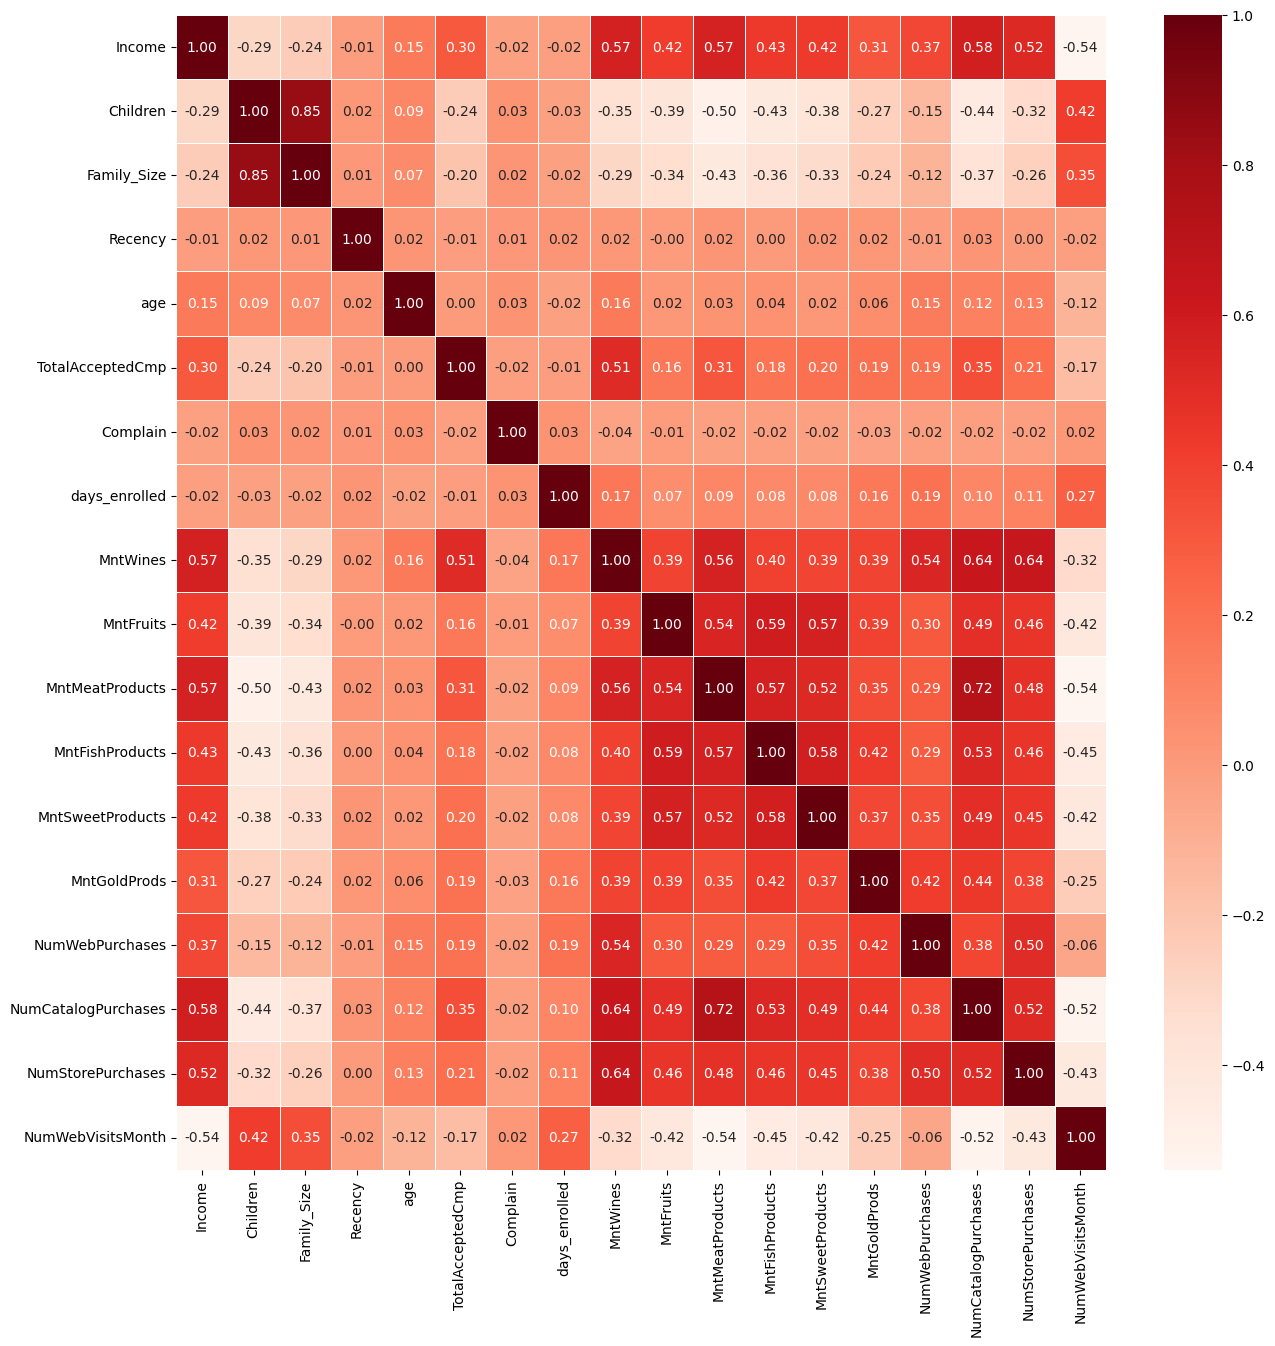

In [145]:
variables = ['Income','Children','Family_Size','Recency','age','TotalAcceptedCmp','Complain','days_enrolled',
             'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
             'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
correlation_matrix = df_cleaned[variables].corr()

# plot the result into a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", linewidths=0.5)
plt.show()

In [146]:
# Convert categorical columns, i.e. Education, to sparse numerical representations
LE=LabelEncoder()
for i in df_cleaned.columns:
    df_cleaned[i]=df_cleaned[[i]].apply(LE.fit_transform)

In [147]:
# Scale the features in the df

# Not sure if we want to drop these columns below
# del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# features = df_cleaned.drop(del_cols, axis=1)
# scaler = StandardScaler()
# scaler.fit(features)
# scaled_features = pd.DataFrame(scaler.transform(features),columns= features.columns)

scaler = StandardScaler()
scaler.fit(df_cleaned)
df_scaled = pd.DataFrame(scaler.transform(df_cleaned),columns= df_cleaned.columns)